In [2]:
import pandas as pd

# Assuming this function needs to be defined:
def fahrenheit_to_celsius(temp_f):
    return (temp_f - 32) * 5/9

class CornGDD:
    def __init__(self, daily_temp_df, time_column, min_temp_column, max_temp_column, celsius=True):
        self.daily_temp_df = daily_temp_df
        self.time_column = time_column
        self.min_temp_column = min_temp_column
        self.max_temp_column = max_temp_column
        self.celsius = celsius

        # Ensure the time column is of datetime type
        self.daily_temp_df[self.time_column] = pd.to_datetime(self.daily_temp_df[self.time_column])

        # Convert the temperature to Celsius if required
        if not self.celsius:
            self.daily_temp_df[self.min_temp_column] = self.daily_temp_df[self.min_temp_column].apply(fahrenheit_to_celsius)
            self.daily_temp_df[self.max_temp_column] = self.daily_temp_df[self.max_temp_column].apply(fahrenheit_to_celsius)
    
    def con_gdd(self, start_date, end_date):
        start_date = pd.Timestamp(start_date)
        end_date = pd.Timestamp(end_date)

        date_mask = (self.daily_temp_df[self.time_column] >= start_date) & (self.daily_temp_df[self.time_column] <= end_date)
        masked_data = self.daily_temp_df.loc[date_mask].copy()

        gdd_values = []
        cumulative_gdd = 0

        for index, row in masked_data.iterrows():
            min_temp = max(row[self.min_temp_column], 10 if self.celsius else 50)
            max_temp = min(row[self.max_temp_column], 30 if self.celsius else 86)

            mean_temp = (min_temp + max_temp) / 2
            base_temp = 10 if self.celsius else 50
            gdd = max(mean_temp - base_temp, 0)

            gdd_values.append(gdd)
            cumulative_gdd += gdd

        masked_data['GDD'] = gdd_values
        masked_data['Cumulative_GDD'] = masked_data['GDD'].cumsum()

        return masked_data

In [3]:
data = pd.read_csv("Saintpaul_combined_data_NOAA.csv")
data

,time,lat,lon,tmax,tmin,prcp,tavg,Year,Month
0,1951-01-01,44.979168,-93.1875,1.062500,-11.593750,0.000000,-5.257812,1951,1
1,1951-01-02,44.979168,-93.1875,-9.531250,-17.492188,0.000000,-13.507812,1951,1
2,1951-01-03,44.979168,-93.1875,-10.429688,-21.968750,1.781250,-16.203125,1951,1
3,1951-01-04,44.979168,-93.1875,-6.867188,-15.789062,1.703125,-11.328125,1951,1
4,1951-01-05,44.979168,-93.1875,-9.929688,-18.992188,3.226562,-14.460938,1951,1
...,...,...,...,...,...,...,...,...,...
26994,2024-12-27,44.979168,-93.1875,2.718750,-0.648438,1.296875,1.039062,2024,12
26995,2024-12-28,44.979168,-93.1875,4.460938,1.843750,15.296875,3.148438,2024,12
26996,2024-12-29,44.979168,-93.1875,7.242188,-0.382812,0.000000,3.429688,2024,12
26997,2024-12-30,44.979168,-93.1875,2.007812,-0.960938,0.000000,0.523438,2024,12


In [4]:
import pandas as pd

# Assuming 'data' DataFrame is already loaded with the necessary columns
# and the CornGDD class is already defined as before

# Function to convert Celsius to Fahrenheit
def celsius_to_fahrenheit(celsius):
    return (celsius * 9/5) + 32

# Iterate over each year from 1951 to 2023
for year in range(1951, 2025):
    # Instantiate the CornGDD class for the year
    corn_gdd_instance = CornGDD(data, 'time', 'tmin', 'tmax')

    # Define the start and end dates for the year
    start_date = pd.to_datetime(f"{year}-01-01").date()
    end_date = pd.to_datetime(f"{year}-12-31").date()

    # Calculate the GDD for the year
    gdd_results = corn_gdd_instance.con_gdd(start_date, end_date)

    # Convert GDD and Cumulative_GDD from Celsius to Fahrenheit
    gdd_results['GDD'] = gdd_results['GDD'].apply(celsius_to_fahrenheit)
    gdd_results['Cumulative_GDD'] = gdd_results['Cumulative_GDD'].apply(celsius_to_fahrenheit)

    # Print only the relevant columns (Time, GDD, and Cumulative_GDD)
    print(f"GDD Results for {year} (in Fahrenheit):\n", gdd_results[['time', 'GDD', 'Cumulative_GDD']], "\n")


GDD Results for 1951 (in Fahrenheit):
           time   GDD  Cumulative_GDD
0   1951-01-01  32.0       32.000000
1   1951-01-02  32.0       32.000000
2   1951-01-03  32.0       32.000000
3   1951-01-04  32.0       32.000000
4   1951-01-05  32.0       32.000000
..         ...   ...             ...
360 1951-12-27  32.0     2452.507812
361 1951-12-28  32.0     2452.507812
362 1951-12-29  32.0     2452.507812
363 1951-12-30  32.0     2452.507812
364 1951-12-31  32.0     2452.507812

[365 rows x 3 columns] 

GDD Results for 1952 (in Fahrenheit):
           time   GDD  Cumulative_GDD
365 1952-01-01  32.0       32.000000
366 1952-01-02  32.0       32.000000
367 1952-01-03  32.0       32.000000
368 1952-01-04  32.0       32.000000
369 1952-01-05  32.0       32.000000
..         ...   ...             ...
726 1952-12-27  32.0     2912.738281
727 1952-12-28  32.0     2912.738281
728 1952-12-29  32.0     2912.738281
729 1952-12-30  32.0     2912.738281
730 1952-12-31  32.0     2912.738281

[366 ro

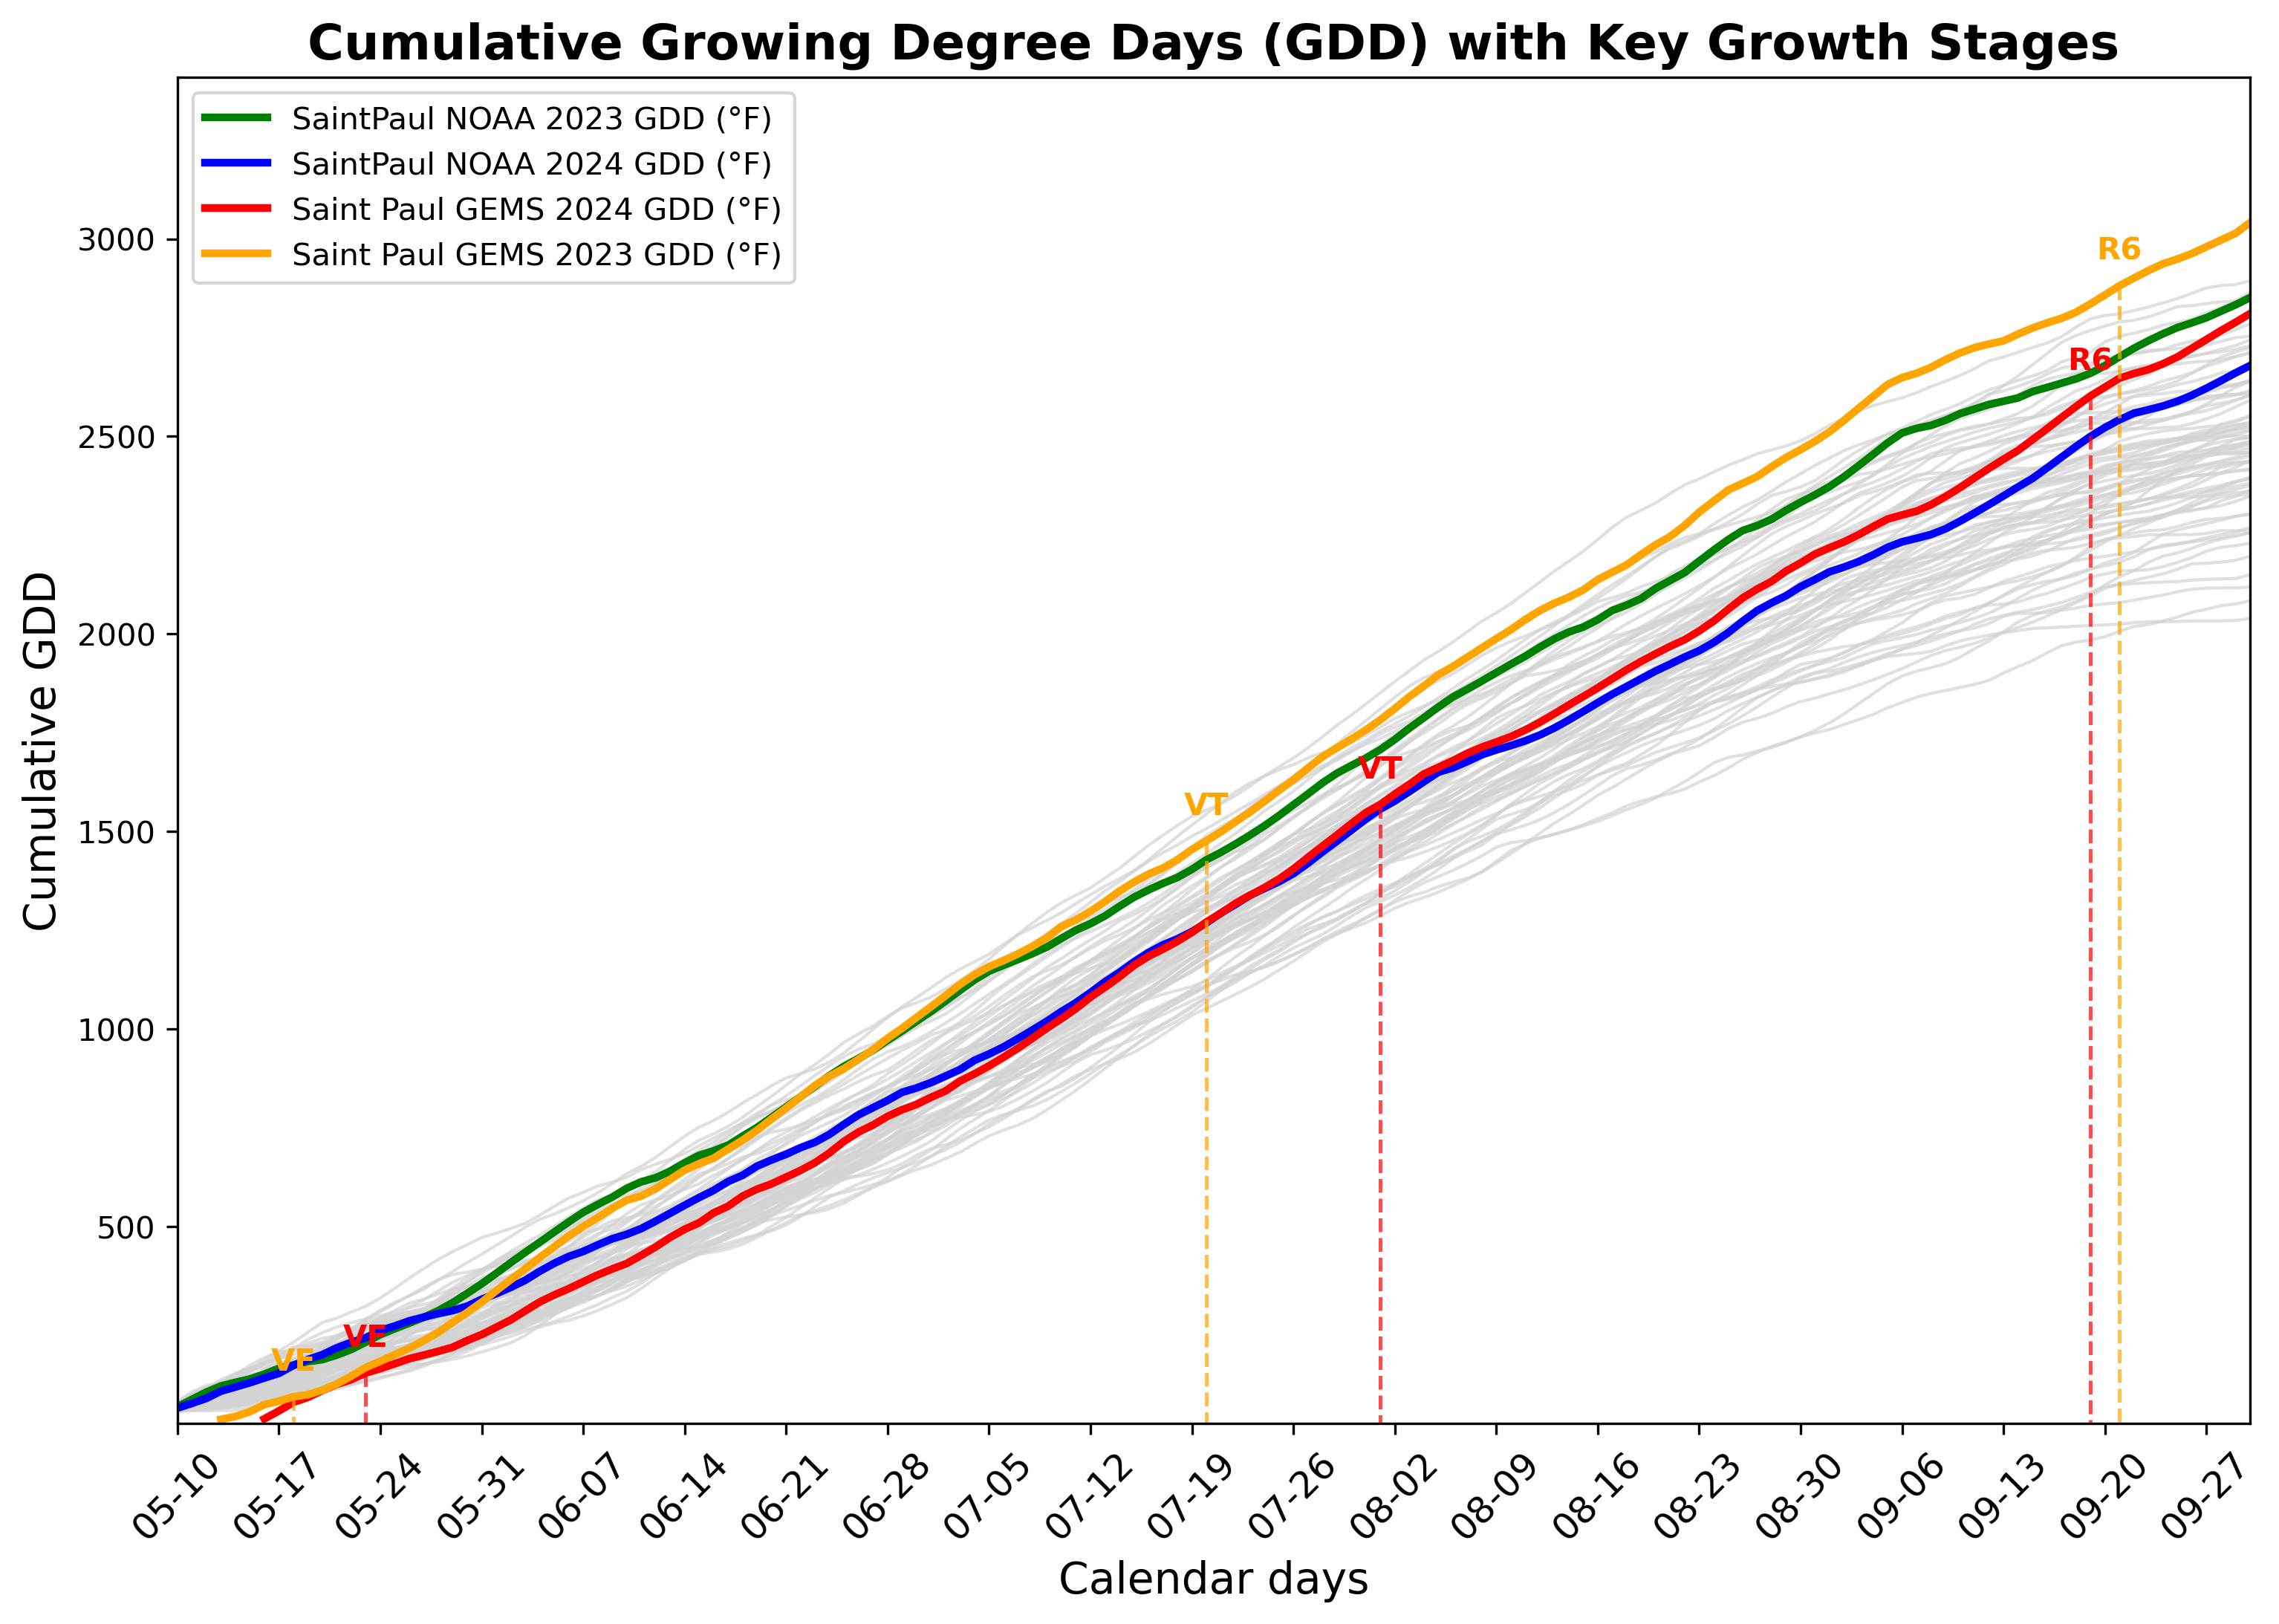

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Becker 2024 & 2023 Data
file_path_2024 = "corn_gdd_StPaulGEMS2024.csv"
file_path_2023 = "corn_gdd_StPaulGEMS2023 .csv"
SP_data_2024 = pd.read_csv(file_path_2024, parse_dates=['datetime'])
SP_data_2023 = pd.read_csv(file_path_2023, parse_dates=['datetime'])

# Load Growth Staging Data 2024 & 2023
growth_staging_2024 = pd.read_csv('GDD corn Saint Paul 2024 GrowthStaging.csv')
growth_staging_2023 = pd.read_csv('SaintPaul 2023 Corn growth stage.csv')

# Clean Column Names
growth_staging_2024.rename(columns=lambda x: x.strip(), inplace=True)
growth_staging_2023.rename(columns=lambda x: x.strip(), inplace=True)

# Convert Dates
growth_staging_2024['Date'] = pd.to_datetime(growth_staging_2024['Date'] + '-2024', format='%d-%b-%Y', errors='coerce')
growth_staging_2023['Date'] = pd.to_datetime(growth_staging_2023['Date'] + '-2023', format='%d-%b-%Y', errors='coerce')

# Get Mode Growth Stage for Each Date
growth_staging_mode_2024 = growth_staging_2024.groupby('Date')['Growth Stage'].agg(lambda x: x.mode()[0]).reset_index()
growth_staging_mode_2023 = growth_staging_2023.groupby('Date')['Growth Stage'].agg(lambda x: x.mode()[0]).reset_index()

# Merge Growth Staging Data
SP_data_2024 = pd.merge(SP_data_2024, growth_staging_mode_2024, left_on='datetime', right_on='Date', how='left')
SP_data_2023 = pd.merge(SP_data_2023, growth_staging_mode_2023, left_on='datetime', right_on='Date', how='left')

# Function to Convert Celsius to Fahrenheit
def celsius_to_fahrenheit(celsius):
    return (celsius * 9/5) + 32

# Initialize Figure
fig, ax1 = plt.subplots(figsize=(12, 8), dpi=300)

# Define X-Axis Labels (Manual Month-Day Labels)
manual_dates = pd.date_range("2024-05-10", "2024-09-30").strftime('%m-%d').tolist()

# Plot Historical NOAA GDD (1951-2022) and NOAA 2023 & 2024
for year in range(1951, 2025):
    if year in [2000, 2016]:  # Skip specific years
        continue

    try:
        # Simulating data retrieval from a function (replace with actual data)
        corn_gdd_instance = CornGDD(data, 'time', 'tmin', 'tmax')  # Assuming you have this function
        gdd_results = corn_gdd_instance.con_gdd(pd.to_datetime(f"{year}-05-10").date(),
                                                pd.to_datetime(f"{year}-09-30").date())

        # Convert only historical GDD to Fahrenheit
        gdd_results['Cumulative_GDD'] = gdd_results['Cumulative_GDD'].apply(celsius_to_fahrenheit)
        gdd_results['Month_Day'] = gdd_results['time'].dt.strftime('%m-%d')

        # Highlight 2024 in Blue
        if year == 2024:
            ax1.plot(gdd_results['Month_Day'], gdd_results['Cumulative_GDD'], 
                     color='blue', linewidth=2.5, linestyle='solid', label="SaintPaul NOAA 2024 GDD (°F)")

        # Highlight 2023 in Green
        elif year == 2023:
            ax1.plot(gdd_results['Month_Day'], gdd_results['Cumulative_GDD'], 
                     color='green', linewidth=2.5, linestyle='solid', label="SaintPaul NOAA 2023 GDD (°F)")

        # Other years in Light Gray
        else:
            ax1.plot(gdd_results['Month_Day'], gdd_results['Cumulative_GDD'], 
                     color='lightgray', alpha=0.7, linewidth=1)

    except:
        continue

# Overlay Becker 2024 & 2023 Data
SP_data_2024['Month_Day'] = SP_data_2024['datetime'].dt.strftime('%m-%d')
SP_data_2023['Month_Day'] = SP_data_2023['datetime'].dt.strftime('%m-%d')

# Plot Becker GEMS 2024 GDD (Red Solid Line)
ax1.plot(SP_data_2024['Month_Day'], SP_data_2024['Cumulative_GDD'], 
         color='red', linewidth=2.5, linestyle='solid', label='Saint Paul GEMS 2024 GDD (°F)')

# Plot Becker GEMS 2023 GDD (Orange Solid Line)
ax1.plot(SP_data_2023['Month_Day'],SP_data_2023['Cumulative_GDD'], 
         color='orange', linewidth=2.5, linestyle='solid', label='Saint Paul GEMS 2023 GDD (°F)')

# Annotate Key Growth Stages for 2024
for i, row in SP_data_2024.dropna(subset=['Growth Stage']).iterrows():
    if row['Growth Stage'] in ['Planted','VE', 'VT', 'R6']:
        ax1.plot([row['Month_Day'], row['Month_Day']], [row['Cumulative_GDD'], 0], 
                 color='red', linestyle='--', linewidth=1.2, alpha=0.7)
        
        ax1.text(row['Month_Day'], row['Cumulative_GDD'] + 50, row['Growth Stage'], 
                 fontsize=10, ha='center', va='bottom', color='red', fontweight='bold')

# Annotate Key Growth Stages for 2023
for i, row in SP_data_2023.dropna(subset=['Growth Stage']).iterrows():
    if row['Growth Stage'] in ['Planted','VE','VT', 'R6']:
        ax1.plot([row['Month_Day'], row['Month_Day']], [row['Cumulative_GDD'], 0], 
                 color='orange', linestyle='--', linewidth=1.2, alpha=0.7)
        
        ax1.text(row['Month_Day'], row['Cumulative_GDD'] + 50, row['Growth Stage'], 
                 fontsize=10, ha='center', va='bottom', color='orange', fontweight='bold')

# Customize X-Axis
ax1.set_xticks(range(0, len(manual_dates), 7))
ax1.set_xticklabels(manual_dates[::7], rotation=45, fontsize=12)

# Customize Axes
ax1.set_xlabel('Calendar days', fontsize=14)
ax1.set_ylabel('Cumulative GDD', fontsize=14, color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Set limits
ax1.set_xlim(0, len(manual_dates) - 1)
ax1.set_ylim(bottom=1)

# Add Legends & Title
ax1.legend(loc="upper left")
plt.title('Cumulative Growing Degree Days (GDD) with Key Growth Stages', fontsize=16, weight='bold')

# Show Plot
plt.show()



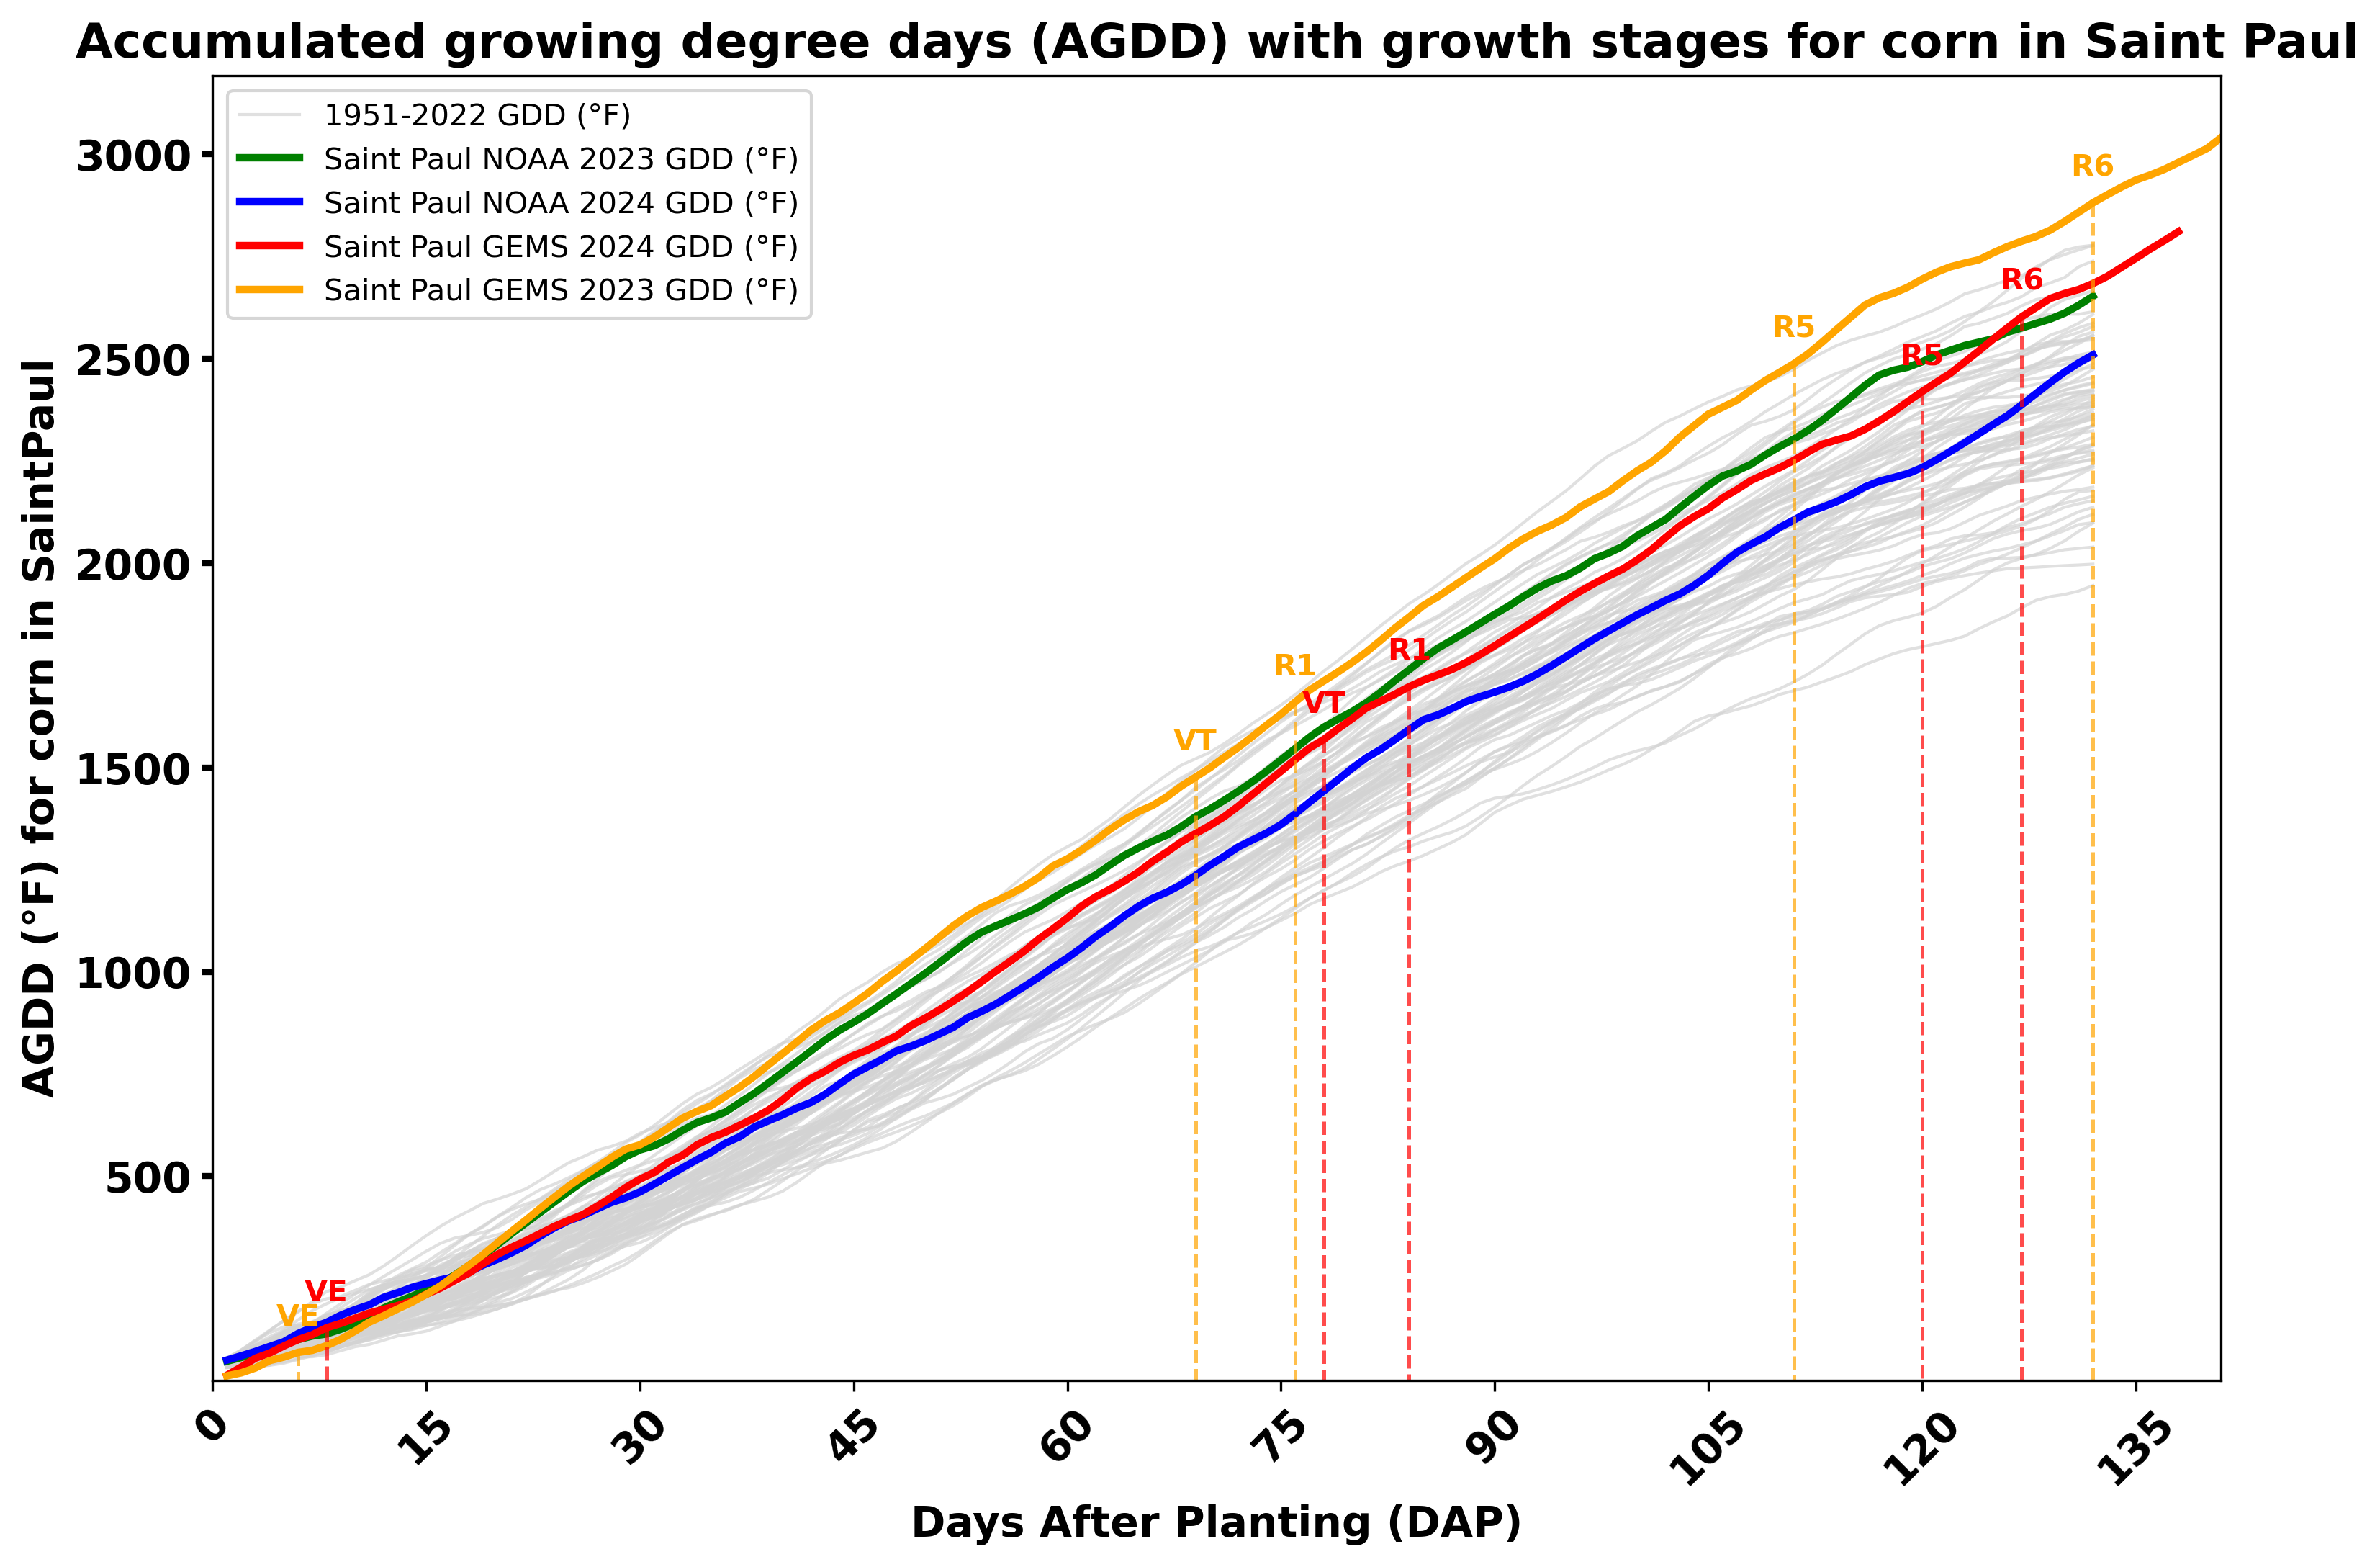

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Define planting dates for DAP calculation
planting_date_2024 = pd.Timestamp("2024-05-15")
planting_date_2023 = pd.Timestamp("2023-05-12")

# Compute Days After Planting (DAP)
SP_data_2024['DAP'] = (SP_data_2024['datetime'] - planting_date_2024).dt.days
SP_data_2023['DAP'] = (SP_data_2023['datetime'] - planting_date_2023).dt.days

# Convert datetime to Month-Day format for filtering
SP_data_2024['Month_Day'] = SP_data_2024['datetime'].dt.strftime('%m-%d')
SP_data_2023['Month_Day'] = SP_data_2023['datetime'].dt.strftime('%m-%d')

# Remove data beyond October 5 (10-05)
SP_data_2024 = SP_data_2024[SP_data_2024['Month_Day'] <= '09-30']
SP_data_2023 = SP_data_2023[SP_data_2023['Month_Day'] <= '09-30']

# Initialize Figure
fig, ax1 = plt.subplots(figsize=(12, 8), dpi=300)


# Add a flag to ensure only one label for 1951-2022 historical GDD
gray_label_added = False  

# Plot Historical NOAA GDD (1951-2022) and NOAA 2023 & 2024 using DAP
for year in range(1951, 2025):
    if year in [2000, 2016]:  # Skip specific years
        continue

    try:
        # Simulating data retrieval from a function (replace with actual data)
        corn_gdd_instance = CornGDD(data, 'time', 'tmin', 'tmax')  # Assuming you have this function
        gdd_results = corn_gdd_instance.con_gdd(pd.to_datetime(f"{year}-05-13").date(),
                                                pd.to_datetime(f"{year}-09-21").date())  

        # Convert GDD to Fahrenheit
        gdd_results['Cumulative_GDD'] = gdd_results['Cumulative_GDD'].apply(celsius_to_fahrenheit)

        # Compute DAP for NOAA (assuming May 2 as planting date)
        gdd_results['DAP'] = (gdd_results['time'] - pd.to_datetime(f"{year}-05-12")).dt.days

        # Remove data beyond October 5 (10-05)
        gdd_results['Month_Day'] = gdd_results['time'].dt.strftime('%m-%d')
        gdd_results = gdd_results[gdd_results['Month_Day'] <= '09-30']

        # Highlight NOAA 2024 in Blue
        if year == 2024:
            ax1.plot(gdd_results['DAP'], gdd_results['Cumulative_GDD'], 
                     color='blue', linewidth=2.5, linestyle='solid', label="Saint Paul NOAA 2024 GDD (°F)")

        # Highlight NOAA 2023 in Green
        elif year == 2023:
            ax1.plot(gdd_results['DAP'], gdd_results['Cumulative_GDD'], 
                     color='green', linewidth=2.5, linestyle='solid', label="Saint Paul NOAA 2023 GDD (°F)")

        # Plot historical data in light gray with only ONE label
        elif not gray_label_added:
            ax1.plot(gdd_results['DAP'], gdd_results['Cumulative_GDD'], 
                     color='lightgray', alpha=0.7, linewidth=1, label="1951-2022 GDD (°F)")
            gray_label_added = True  # Ensure label is only added once
        else:
            ax1.plot(gdd_results['DAP'], gdd_results['Cumulative_GDD'], 
                     color='lightgray', alpha=0.7, linewidth=1)  # No label for other lines

    except:
        continue

# PlotBec ker GEMS 2024 GDD (Red Solid Line)
ax1.plot(SP_data_2024['DAP'], SP_data_2024['Cumulative_GDD'], 
         color='red', linewidth=2.5, linestyle='solid', label='Saint Paul GEMS 2024 GDD (°F)')

# Plot Becker GEMS 2023 GDD (Orange Solid Line)
ax1.plot(SP_data_2023['DAP'], SP_data_2023['Cumulative_GDD'], 
         color='orange', linewidth=2.5, linestyle='solid', label='Saint Paul GEMS 2023 GDD (°F)')

# Annotate Key Growth Stages for 2023
for i, row in SP_data_2023.dropna(subset=['Growth Stage']).iterrows():
    if row['Growth Stage'] in ['VE','VT','R1','R5','R6']:
        ax1.plot([row['DAP'], row['DAP']], [row['Cumulative_GDD'], 0], 
                 color='orange', linestyle='--', linewidth=1.2, alpha=0.7)
        
        ax1.text(row['DAP'], row['Cumulative_GDD'] + 50, row['Growth Stage'], 
                 fontsize=10, ha='center', va='bottom', color='orange', fontweight='bold')

# Annotate Key Growth Stages for 2024
for i, row in SP_data_2024.dropna(subset=['Growth Stage']).iterrows():
    if row['Growth Stage'] in ['VE', 'VT','R1','R5','R6']:
        ax1.plot([row['DAP'], row['DAP']], [row['Cumulative_GDD'], 0], 
                 color='red', linestyle='--', linewidth=1.2, alpha=0.7)
        
        ax1.text(row['DAP'], row['Cumulative_GDD'] + 50, row['Growth Stage'], 
                 fontsize=10, ha='center', va='bottom', color='red', fontweight='bold')


# Customize X-Axis (Set Ticks to Every 7 Days)
ax1.set_xticks(range(0, 165, 15)) # Set ticks every 20 days (adjustable)
ax1.set_xticklabels(range(0, 165, 15),rotation=45, fontsize=14, weight = 'bold')  # Ensure labels match


# Customize Axes
ax1.set_xlabel('Days After Planting (DAP)', fontsize=14, weight = 'bold')
ax1.set_ylabel('Cumulative GDD (°F)', fontsize=14, color='black', weight = 'bold')
ax1.tick_params(axis='y', labelcolor='black')
# Make Y-Axis Bold
ax1.set_ylabel('AGDD (°F) for corn in SaintPaul', fontsize=14, color='black', weight='bold')
ax1.tick_params(axis='y', labelcolor='black', labelsize=14, width=2)

# Make Y-Axis Tick Labels Bold
for label in ax1.get_yticklabels():
    label.set_fontweight('bold')
# Set limits based on October 5
ax1.set_xlim(left=0, right=max(SP_data_2024['DAP'].max(), SP_data_2023['DAP'].max()))  # Stop at Oct 5
ax1.set_ylim(bottom=1)

# Add Legends & Title
ax1.legend(loc="upper left")
plt.title('Accumulated growing degree days (AGDD) with growth stages for corn in Saint Paul', fontsize=16, weight='bold')
# Save Figure for Manuscript Submission (600 DPI)

plt.savefig('SaintPaul_CORN_gdd_plot.png', format='png', dpi=600, bbox_inches='tight')
plt.show()  # Show only after saving


In [7]:
print(SP_data_2023[['DAP', 'Cumulative_GDD', 'Growth Stage']].dropna())


     DAP  Cumulative_GDD Growth Stage
5      6           69.12           VE
12    13          175.59           V2
19    20          337.50           V4
26    27          522.45           V6
33    34          658.80           V7
40    41          828.18           V9
47    48         1001.79          V10
54    55         1173.24          V13
61    62         1322.37          V15
68    69         1476.45           VT
75    76         1660.50           R1
82    83         1841.04        R1-R2
89    90         2010.51           R2
96    97         2156.40           R3
103  104         2336.22           R4
110  111         2487.78           R5
117  118         2659.86        R5-R6
124  125         2758.95        R5-R6
131  132         2881.44           R6


In [12]:
import pandas as pd

# Load Saint Paul data
data = pd.read_csv("Saintpaul_combined_data_NOAA.csv")
data['time'] = pd.to_datetime(data['time'])

# === 2023 Stages ===
planting_2023 = pd.Timestamp("2023-05-12")
ve_2023 = pd.Timestamp("2023-05-18")
vt_2023 = pd.Timestamp("2023-07-27")
r4_2023 = pd.Timestamp("2023-08-24")
r6_2023 = pd.Timestamp("2023-09-21")

# === 2024 Stages ===
planting_2024 = pd.Timestamp("2024-05-15")
ve_2024 = pd.Timestamp("2024-05-23")
vt_2024 = pd.Timestamp("2024-08-01")
r4_2024 = pd.Timestamp("2024-09-04")
r6_2024 = pd.Timestamp("2024-09-19")

# === Cumulative precipitation calculations ===
# 2023
precip_2023_ve_vt = data[(data['time'] >= ve_2023) & (data['time'] <= vt_2023)]['prcp'].sum()
precip_2023_vt_r4 = data[(data['time'] > vt_2023) & (data['time'] <= r4_2023)]['prcp'].sum()
precip_2023_plant_r6 = data[(data['time'] >= planting_2023) & (data['time'] <= r6_2023)]['prcp'].sum()

# 2024
precip_2024_ve_vt = data[(data['time'] >= ve_2024) & (data['time'] <= vt_2024)]['prcp'].sum()
precip_2024_vt_r4 = data[(data['time'] > vt_2024) & (data['time'] <= r4_2024)]['prcp'].sum()
precip_2024_plant_r6 = data[(data['time'] >= planting_2024) & (data['time'] <= r6_2024)]['prcp'].sum()

# === Create summary DataFrame ===
saintpaul_corn_precip_summary = pd.DataFrame({
    'Year': [2023, 2023, 2023, 2024, 2024, 2024],
    'Period': ['VE to VT', 'VT to R4', 'Planting to R6'] * 2,
    'Cumulative Precipitation (mm)': [
        precip_2023_ve_vt, precip_2023_vt_r4, precip_2023_plant_r6,
        precip_2024_ve_vt, precip_2024_vt_r4, precip_2024_plant_r6
    ]
})

print(saintpaul_corn_precip_summary)


   Year          Period  Cumulative Precipitation (mm)
0  2023        VE to VT                      89.078125
1  2023        VT to R4                     111.984375
2  2023  Planting to R6                     230.890625
3  2024        VE to VT                     358.890625
4  2024        VT to R4                     143.523438
5  2024  Planting to R6                     586.851562
